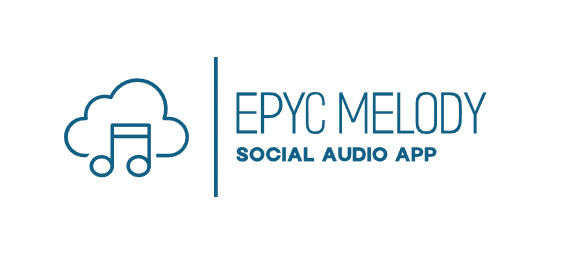

# 03 : Modèle n°2 - vectorisation

Cette approche se concentre sur le champ lexical rattaché à chaque morceaux.<br/>
En effet, chaque morceau est identifié par un track_id, et par un ou plusieurs hashtags.

Partant du principe que les hashtags sont correctement renseignés, nous cherchons à proposer à un utilisateur des morceaux de musiques similaires à celui qu'il écoute en terme de hashtags.

In [1]:
# librairies
import numpy as np
import pandas as pd

import time
from datetime import timedelta
begin_time = time.time()

In [2]:
df_global = pd.read_csv('df_global.csv')

<u>__Aperçu des données__</u>

In [3]:
df_global.head()

,index,user_id,track_id,artist_id,created_at,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,region,hashtag,sent_score
0,0,81496937,cd52b3e5b51da29e5893dba82a418a4b,b2980c722a1ace7a30303718ce5491d8,2014-01-01 05:54:21,0.00479,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,America,goth,NaN
1,1,81496937,cd52b3e5b51da29e5893dba82a418a4b,b2980c722a1ace7a30303718ce5491d8,2014-01-01 05:54:21,0.00479,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,America,deathrock,0.190625
2,2,81496937,cd52b3e5b51da29e5893dba82a418a4b,b2980c722a1ace7a30303718ce5491d8,2014-01-01 05:54:21,0.00479,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,America,postpunk,0.000000
3,3,2205686924,da3110a77b724072b08f231c9d6f7534,5cddcd0e314e2f2223ab21937d2c8778,2014-01-01 05:54:22,0.01770,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.26700,0.826,undefined,80s,NaN
4,4,2205686924,da3110a77b724072b08f231c9d6f7534,5cddcd0e314e2f2223ab21937d2c8778,2014-01-01 05:54:22,0.01770,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.26700,0.826,undefined,retro,NaN


***
## Traitement des données

Regroupement des hashtags d'un même morceau (track_id).<br>
Nettoyage.


In [4]:
# creation d'un dataframe 1 morceau et tous les hashtags (suppression des doublons id - hashtag)
df_vector = df_global[['track_id','hashtag']].astype(str).drop_duplicates().groupby(['track_id'], as_index = False).agg({'hashtag': ' '.join})
df_vector.head()

,track_id,hashtag
0,00003213fb3d4959f42e9157b0eda0a5,newchristianmusic
1,0000e47c1207e2c637a44753a713456f,rock pops 70s music
2,0001dc79946a42fbc837c044be0bdbbc,apt
3,000248c97c5991b9900360aca97d9879,musicislife disturbed tbfmonline vkscrobbler
4,00027df4d0bd64108624757fe4cbfe76,radio rock music hardrock


In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# ajouter stopwords
useless_words = ['listenlive','class95','kiss92','music','6music','234radio',
                 'jammin105','radio2','audio5cafe','radio','bbc6music','tweetlink',
                 'myplaylist','tbfmonline', 'vkscrobbler', 'wzbt', 'nowlistening',
                 'spotify', 'onlineradio', 'tunein', 
                 'hottraxxradio', 'radiokaras', 'itunes', 'nowonair', 'rcbs', 'musicbox', 'radio19', 'radiowivenhoe',
                 'listeningnow', 'musiquenonstop', 'anghami', 'tuneinradio', 'radio1', 'barbwiresradio', 'musicislife', 
                 'radiopowermix', 'yourmusic', 'freshradio'
                 'googleplay', 'songoftheday', 'nazaplaylist', 'repost', 'iphone', 'windowsphone', 'android', 'blackberry', 
                 'ontheair', 'onair', 'listeningto', 'like', 'radio98rock', 'lastfm', 'hgsradio', 'twittamp'
                ]
stop.extend(useless_words)

# hashtag sans les stopwords
df_vector['hashtag_cleaned'] = df_vector['hashtag'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# remplacer mots vides (espaces) par NaN
df_vector['hashtag_cleaned'] = df_vector['hashtag_cleaned'].replace(r'^\s*$', np.NaN, regex=True)

# colonnes différentes
df_vector[df_vector['hashtag']!=df_vector['hashtag_cleaned']]


,track_id,hashtag,hashtag_cleaned
1,0000e47c1207e2c637a44753a713456f,rock pops 70s music,rock pops 70s
3,000248c97c5991b9900360aca97d9879,musicislife disturbed tbfmonline vkscrobbler,disturbed
4,00027df4d0bd64108624757fe4cbfe76,radio rock music hardrock,rock hardrock
5,000359abe73f500143335921d078a7b0,listenlive class95 kiss92 music 6music radiopo...,tsgonair planet90 niurock radiocidadeoficial t...
7,0003f7b02133154299b9c65215b3ac1e,wzbt,NaN
...,...,...,...
161339,fffd0d291f4addb6c4640a0f50d22f3f,hitmusic chicagomusic listenlive hitparty,hitmusic chicagomusic hitparty
161340,fffd0e6aa371d5d9f325092b4b176a5b,listenlive,NaN
161342,fffd8d636ba5082a01d9f4127ac17b89,listenlive,NaN
161343,fffd997ff184ba9929358a77644fff6c,musicislife,NaN


In [6]:
df_vector.dropna(subset=['hashtag_cleaned'], inplace=True)
df_vector.drop(columns=['hashtag'], inplace=True)

df_vector.reset_index(drop=True, inplace=True)

***
## Vectorisation

Usge de TF-IDF + linear_kernel.<br>
Automatisation via quelques fonctions.


In [7]:
# matrice de similarité - term frequency, inverse document frequency (tf-idf)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit_transform(df_vector['hashtag_cleaned'])
tfidf.shape


(99507, 42218)

In [8]:
from sklearn.metrics.pairwise import linear_kernel

'''
    fonctions utiles
'''

# renvoie les hashtags de l'index 
# (si l'index existe dans le dataframe)
def get_hashtags_by_index(df_index):
    if df_index in df_vector.index:
        return df_vector.iloc[df_index]['hashtag_cleaned']
    
# renvoie les hashtags du track_id
# (si le track_id existe dans le dataframe)
def get_hashtags_by_track_id(track_id):
    if df_vector['track_id'].str.contains(track_id).any():
        return df_vector[df_vector['track_id']==track_id]['hashtag_cleaned'].values[0]

    
# renvoie le track_id de l'index
# (si l'index existe dans le dataframe)
def get_trackid_by_index(df_index):
    if df_index in df_vector.index:
        return df_vector.iloc[df_index]['track_id']


# renvoie l'index du track_id
# (si le track_id existe dans le dataframe)
def get_index_by_trackid(track_id):
    if df_vector['track_id'].str.contains(track_id).any():
        return df_vector.index[df_vector['track_id']==track_id].tolist()[0]

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


'''
    recherche nb morceaux similaires à track_id
    via la colonne qui regroupe les hashtags
'''
def similar_tune(track_id, nb):
    # recherche de l'index du track_id dans le dataframe
    df_index = get_index_by_trackid(track_id)
    
    # matrice de similarité
    hashtag_similarities = linear_kernel(tfidf[df_index:df_index+1], tfidf).flatten()
    
    # resultats similaires (index)
    similar_tunes_idx = hashtag_similarities.argsort()[:-nb-1:-1]
    
    # conversion au format dataframe (index, track_id, hashtag)
    idx_fnd = []
    trk_fnd = []
    hsh_fnd = []
    
    for res in similar_tunes_idx:
        tune_found = get_trackid_by_index(res)
        hashtags_found = get_hashtags_by_index(res)
        idx_fnd.append(res)
        trk_fnd.append(tune_found)
        hsh_fnd.append(get_hashtags_by_index(res))
    return pd.DataFrame({'idx' : idx_fnd, 'track_id' : trk_fnd,'hashtags' : hsh_fnd})


<u>Exemples :</u>

In [9]:
# morceau de référence
tune = 'c0a3db38bd9f8f8c44ed0c2d0e1b60af'

# nb de suggestions souhaitées
nb = 10

print('morceau : [',get_index_by_trackid(tune), "] : track_id =", tune)
print('hashtags:',get_hashtags_by_track_id(tune))
print('-----------------------------------------------------------------------')
print('résultats:')

similar_tune(tune,nb)


morceau : [ 75059 ] : track_id = c0a3db38bd9f8f8c44ed0c2d0e1b60af
hashtags: rock pops 70s
-----------------------------------------------------------------------
résultats:


,idx,track_id,hashtags
0,75059,c0a3db38bd9f8f8c44ed0c2d0e1b60af,rock pops 70s
1,1,0000e47c1207e2c637a44753a713456f,rock pops 70s
2,26888,45138db5d3e84a423b12650a0f65d4a6,rock 70s pops
3,39559,65929a3541868bf88b85bdc16e86e1d0,rock pops 60s
4,21711,37bc24b5c16cc1f91a1049d6ebed410b,pops 00s
5,63834,a4196978d57dd77ce85628bc86cb27d1,rock 70s
6,1608,03e508ca8989f648f305283100388b6c,rock hardrock 70s
7,39090,646a1e0d1b8ceb54ce87f017d4357071,rock hardrock 70s
8,54180,8b4146285e3ca27693c3b1cf81851e1c,rock hardrock 70s
9,91834,ec3ac9eb8e3df884700b76c70c252b5f,rock hardrock 70s


In [10]:
# autres tests

# morceau de référence
# tune = '00c838d53a639dcd4987fd0f92e5a674' # jazz
# tune = '00909a7d394b9aeb5c921c30d61f886f' # punk
# tune = '3e9e93051bbb2bc8979e111caa5c044c' # classical

# fail
tune ='d801089f2dea97bb0ea5b95c875465e0'

# nb de suggestions souhaitées
nb = 5

print('morceau : [',get_index_by_trackid(tune), "] : track_id =", tune)
print('hashtags:',get_hashtags_by_track_id(tune))
print('-----------------------------------------------------------------------')
print('résultats:')

similar_tune(tune,nb)


morceau : [ 84052 ] : track_id = d801089f2dea97bb0ea5b95c875465e0
hashtags: juevesmeloso
-----------------------------------------------------------------------
résultats:


,idx,track_id,hashtags
0,84052,d801089f2dea97bb0ea5b95c875465e0,juevesmeloso
1,99506,fffdf00857154771de0d8479d8341e1e,stonerrock doommetal
2,33172,5536b4607350d3c4ffc4cb39fad8ec18,b3atskoncept
3,33162,552f04e6ae6341cd7d205d555bba94ab,adrfm edm chicagomusic geny hdm trance harddan...
4,33163,552f753b95c5a0ac45074e230dd780ab,miss classactress bad


<u>Erreurs du modèle :</u>

In [11]:
# autres tests

# fail
tune ='f16e9029afe5e148d2dffcf88a55603b'
# get_trackid_by_index(104841)

# nb de suggestions souhaitées
nb = 5

print('morceau : [',get_index_by_trackid(tune), "] : track_id =", tune)
print('hashtags:',get_hashtags_by_track_id(tune))
print('-----------------------------------------------------------------------')
print('résultats:')

similar_tune(tune,nb)


morceau : [ 93823 ] : track_id = f16e9029afe5e148d2dffcf88a55603b
hashtags: hiltonhead savannah progressiveradio toulouse sanjose phoenix word beatbc winnipeg belfast brunswick freshlysqueezed aracityradio rock metal bringinitback manchester rheims orleans kamloops pittsburgh anchorage takeovertext 2002年の音楽 radiocidadeoficial tocandonacidade fuerzamartes cancióndeviernes cancióndeldía nanaimo liverpool köln lille tacoma fragradio gaming foofighters turnitup turnup rockon tocando brazil atacalaradio allmylife tsgonair
-----------------------------------------------------------------------
résultats:


,idx,track_id,hashtags
0,93823,f16e9029afe5e148d2dffcf88a55603b,hiltonhead savannah progressiveradio toulouse ...
1,31947,51f31c2eb4aa9fbfcb9f6ddc6f716416,savannah hiltonhead belfast brunswick la liver...
2,58861,9774a311af1b0e64e092e50f4a35ec2a,worldclassmusic savannah hiltonhead auckland b...
3,96863,f92726d6d470a7f911257132863bdf5c,progressiveradio savannah hiltonhead orleans l...
4,74443,bf1468972cc9e5360fb681d9c6bceda5,progressiveradio savannah hiltonhead buffalo o...


<u>Exemple aléatoire :</u>

In [12]:
# test random
tune = df_vector.iloc[np.random.randint(0,len(df_vector.index)+1)].track_id

nb = 5

print('morceau : [',get_index_by_trackid(tune), "] : track_id =", tune)
print('hashtags:',get_hashtags_by_track_id(tune))
print('-----------------------------------------------------------------------')
print('résultats:')

similar_tune(tune,nb)



morceau : [ 71761 ] : track_id = b829c1404040891bd665133d43ad9c69
hashtags: thebull new country thebullradio countrymusic kbest957
-----------------------------------------------------------------------
résultats:


,idx,track_id,hashtags
0,81833,d211c3e54f30fd8999e00b2f1f4e54d3,thebull new country thebullradio countrymusic ...
1,92230,ed4c03602f249d413b8409d1744ecc02,thebull new country thebullradio kbest957 coun...
2,71761,b829c1404040891bd665133d43ad9c69,thebull new country thebullradio countrymusic ...
3,21081,360a6a92c5db181c3d2ccc366ed2af71,countrymusic thebull new country thebullradio ...
4,18857,3074a49e6cee50bfa80cde288f6977d7,thebull new country thebullradio countrymusic ...


***

# Sauvegardes pour Streamlit

Dump dataset & TfidfVectorizer.

In [13]:
# version notebook
df_vector
df_vector.to_csv('df_vector.csv',index=False)

import pickle
pickle.dump(tfidf, open("tfidf_vector.pickle", "wb"))

df_vector.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99507 entries, 0 to 99506
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   track_id         99507 non-null  object
 1   hashtag_cleaned  99507 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [14]:
# version light (web)

df_vector_light = df_vector.sample(n=30000, random_state=1975)
tfidf_light = TfidfVectorizer().fit_transform(df_vector_light['hashtag_cleaned'])

df_vector_light.to_csv('df_vector_light.csv',index=False)
pickle.dump(tfidf_light, open("tfidf_vector_light.pickle", "wb"))

df_vector_light.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 6633 to 90552
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   track_id         30000 non-null  object
 1   hashtag_cleaned  30000 non-null  object
dtypes: object(2)
memory usage: 703.1+ KB


In [15]:
print("\ntps d'éxécution total du notebook: ",timedelta(seconds=round((time.time() - begin_time),0)))


tps d'éxécution total du notebook:  0:00:41
